### Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [25]:
import warnings
warnings.filterwarnings("ignore")

### Data Explorating and Pre-Processing

In [26]:
df = pd.read_csv("CC GENERAL.csv")

In [27]:
df.shape

(8950, 18)

The dataset has 8950 rows and 18 columns.

In [28]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [29]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Handling Missing Values

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [31]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* **CREDIT_LIMIT** has 1 missing value.
* **MINIMUM_PAYMENTS** has 313 missing values.

Since there are not many missing values, we will simply drop them.

In [32]:
df.dropna(inplace = True)

In [33]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

All missing values have been dealt with and our dataset is now free of missing values.

#### Handling Duplicated Values

In [34]:
df[df.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


There are no duplicated values in our dataset.

#### Dropping the ID Column

In [35]:
df.drop("CUST_ID", axis = 1, inplace = True)

In [36]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [37]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


### Statistical Analysis

In [38]:
df.describe(include = 'all')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [39]:
def calculate_majority_moments(dataframe):
    moments_dict = {
        'Mean': dataframe.mean(),
        'Median': dataframe.median(),
        'Standard Deviation': dataframe.std(),
        'Skewness': dataframe.skew(),
        'Kurtosis': dataframe.kurtosis()
    }
    
    moments_df = pd.DataFrame(moments_dict)
    moments_df.index.name = 'Column'
    
    return moments_df

moments_table = calculate_majority_moments(df)
print("Majority Moments:")
display(moments_table)

Majority Moments:


,Mean,Median,Standard Deviation,Skewness,Kurtosis
Column,,,,,
BALANCE,1601.224893,916.855459,2095.571300,2.374254,7.553876
BALANCE_FREQUENCY,0.895035,1.000000,0.207697,-2.084161,3.369586
PURCHASES,1025.433874,375.405000,2167.107984,8.055789,108.677684
ONEOFF_PURCHASES,604.901438,44.995000,1684.307803,9.935776,160.121308
INSTALLMENTS_PURCHASES,420.843533,94.785000,917.245182,7.216133,94.193373
CASH_ADVANCE,994.175523,0.000000,2121.458303,5.139629,52.143523
PURCHASES_FREQUENCY,0.496000,0.500000,0.401273,0.033041,-1.638001
ONEOFF_PURCHASES_FREQUENCY,0.205909,0.083333,0.300054,1.504234,1.058206
PURCHASES_INSTALLMENTS_FREQUENCY,0.368820,0.166667,0.398093,0.487753,-1.419279


**Skewness:** Skewness measures the asymmetry of the distribution of values in a dataset.
* A skewness value of 0 indicates a perfectly symmetrical distribution, where the mean, median, and mode are all equal.
* If skewness is greater than 0, the distribution is positively skewed, meaning it has a longer tail on the right side of the distribution (right-skewed).
* If skewness is less than 0, the distribution is negatively skewed, meaning it has a longer tail on the left side of the distribution (left-skewed).

**Kurtosis:** Kurtosis measures the shape of the distribution and describes how peaked or flat the distribution is compared to a normal distribution. 
* A kurtosis value of 0 indicates the distribution has the same peak as a normal distribution (mesokurtic).
* If kurtosis is greater than 0, the distribution is more peaked (leptokurtic) and has heavier tails compared to a normal distribution.
* If kurtosis is less than 0, the distribution is flatter (platykurtic) and has lighter tails compared to a normal distribution.

Now, let's interpret the output for a few columns with respect to Skewness and Kurtosis:

**BALANCE:**
* Skewness: 2.374254 (positive skew)
* Kurtosis: 7.553876 (leptokurtic)
* The distribution is positively skewed, indicating that there are more customers with lower balances and a few with very high balances.
* The distribution is also leptokurtic, meaning it has heavier tails and is more peaked compared to a normal distribution.

**PURCHASES:**
* Skewness: 8.055789 (positive skew)
* Kurtosis: 108.677684 (leptokurtic)
* The distribution is highly positively skewed, indicating that most customers make smaller purchases, while a few customers make very large purchases.
* The distribution is heavily leptokurtic, suggesting that it has extremely heavy tails and is highly peaked compared to a normal distribution.

**CASH_ADVANCE:**
* Skewness: 5.139629 (positive skew)
* Kurtosis: 52.143523 (leptokurtic)
* The distribution is positively skewed, indicating that most customers have lower cash advance amounts, while a few customers have very high cash advance amounts.
* The distribution is also leptokurtic, meaning it has heavy tails and is more peaked compared to a normal distribution.

Since many of the columns are skewed, we will apply log transformation to all those columns whose skewness is more than 0.5 on either side.

In [40]:
def apply_log_transformation(dataset, skew_threshold = 0.5):
    # compute skewness of each column
    skewness = dataset.skew()
    
    # identify skewed columns
    skewed_columns = skewness[abs(skewness) > skew_threshold].index

    # apply log transformation to skewed columns
    for column in skewed_columns:
        dataset[column] = np.log1p(dataset[column])

    return dataset

transformed_df = df.copy()
transformed_df = apply_log_transformation(transformed_df)
transformed_df.skew()

Column
BALANCE                            -0.776004
BALANCE_FREQUENCY                  -2.308566
PURCHASES                          -0.777688
ONEOFF_PURCHASES                    0.168420
INSTALLMENTS_PURCHASES             -0.042157
CASH_ADVANCE                        0.248169
PURCHASES_FREQUENCY                 0.033041
ONEOFF_PURCHASES_FREQUENCY          1.260722
PURCHASES_INSTALLMENTS_FREQUENCY    0.487753
CASH_ADVANCE_FREQUENCY              1.425892
CASH_ADVANCE_TRX                    0.920619
PURCHASES_TRX                       0.009795
CREDIT_LIMIT                       -0.106402
PAYMENTS                           -0.050354
MINIMUM_PAYMENTS                    0.251524
PRC_FULL_PAYMENT                    1.690590
TENURE                             -3.245650
dtype: float64

### Exploratory Data Analysis and Visualization

#### Distribution of Columns

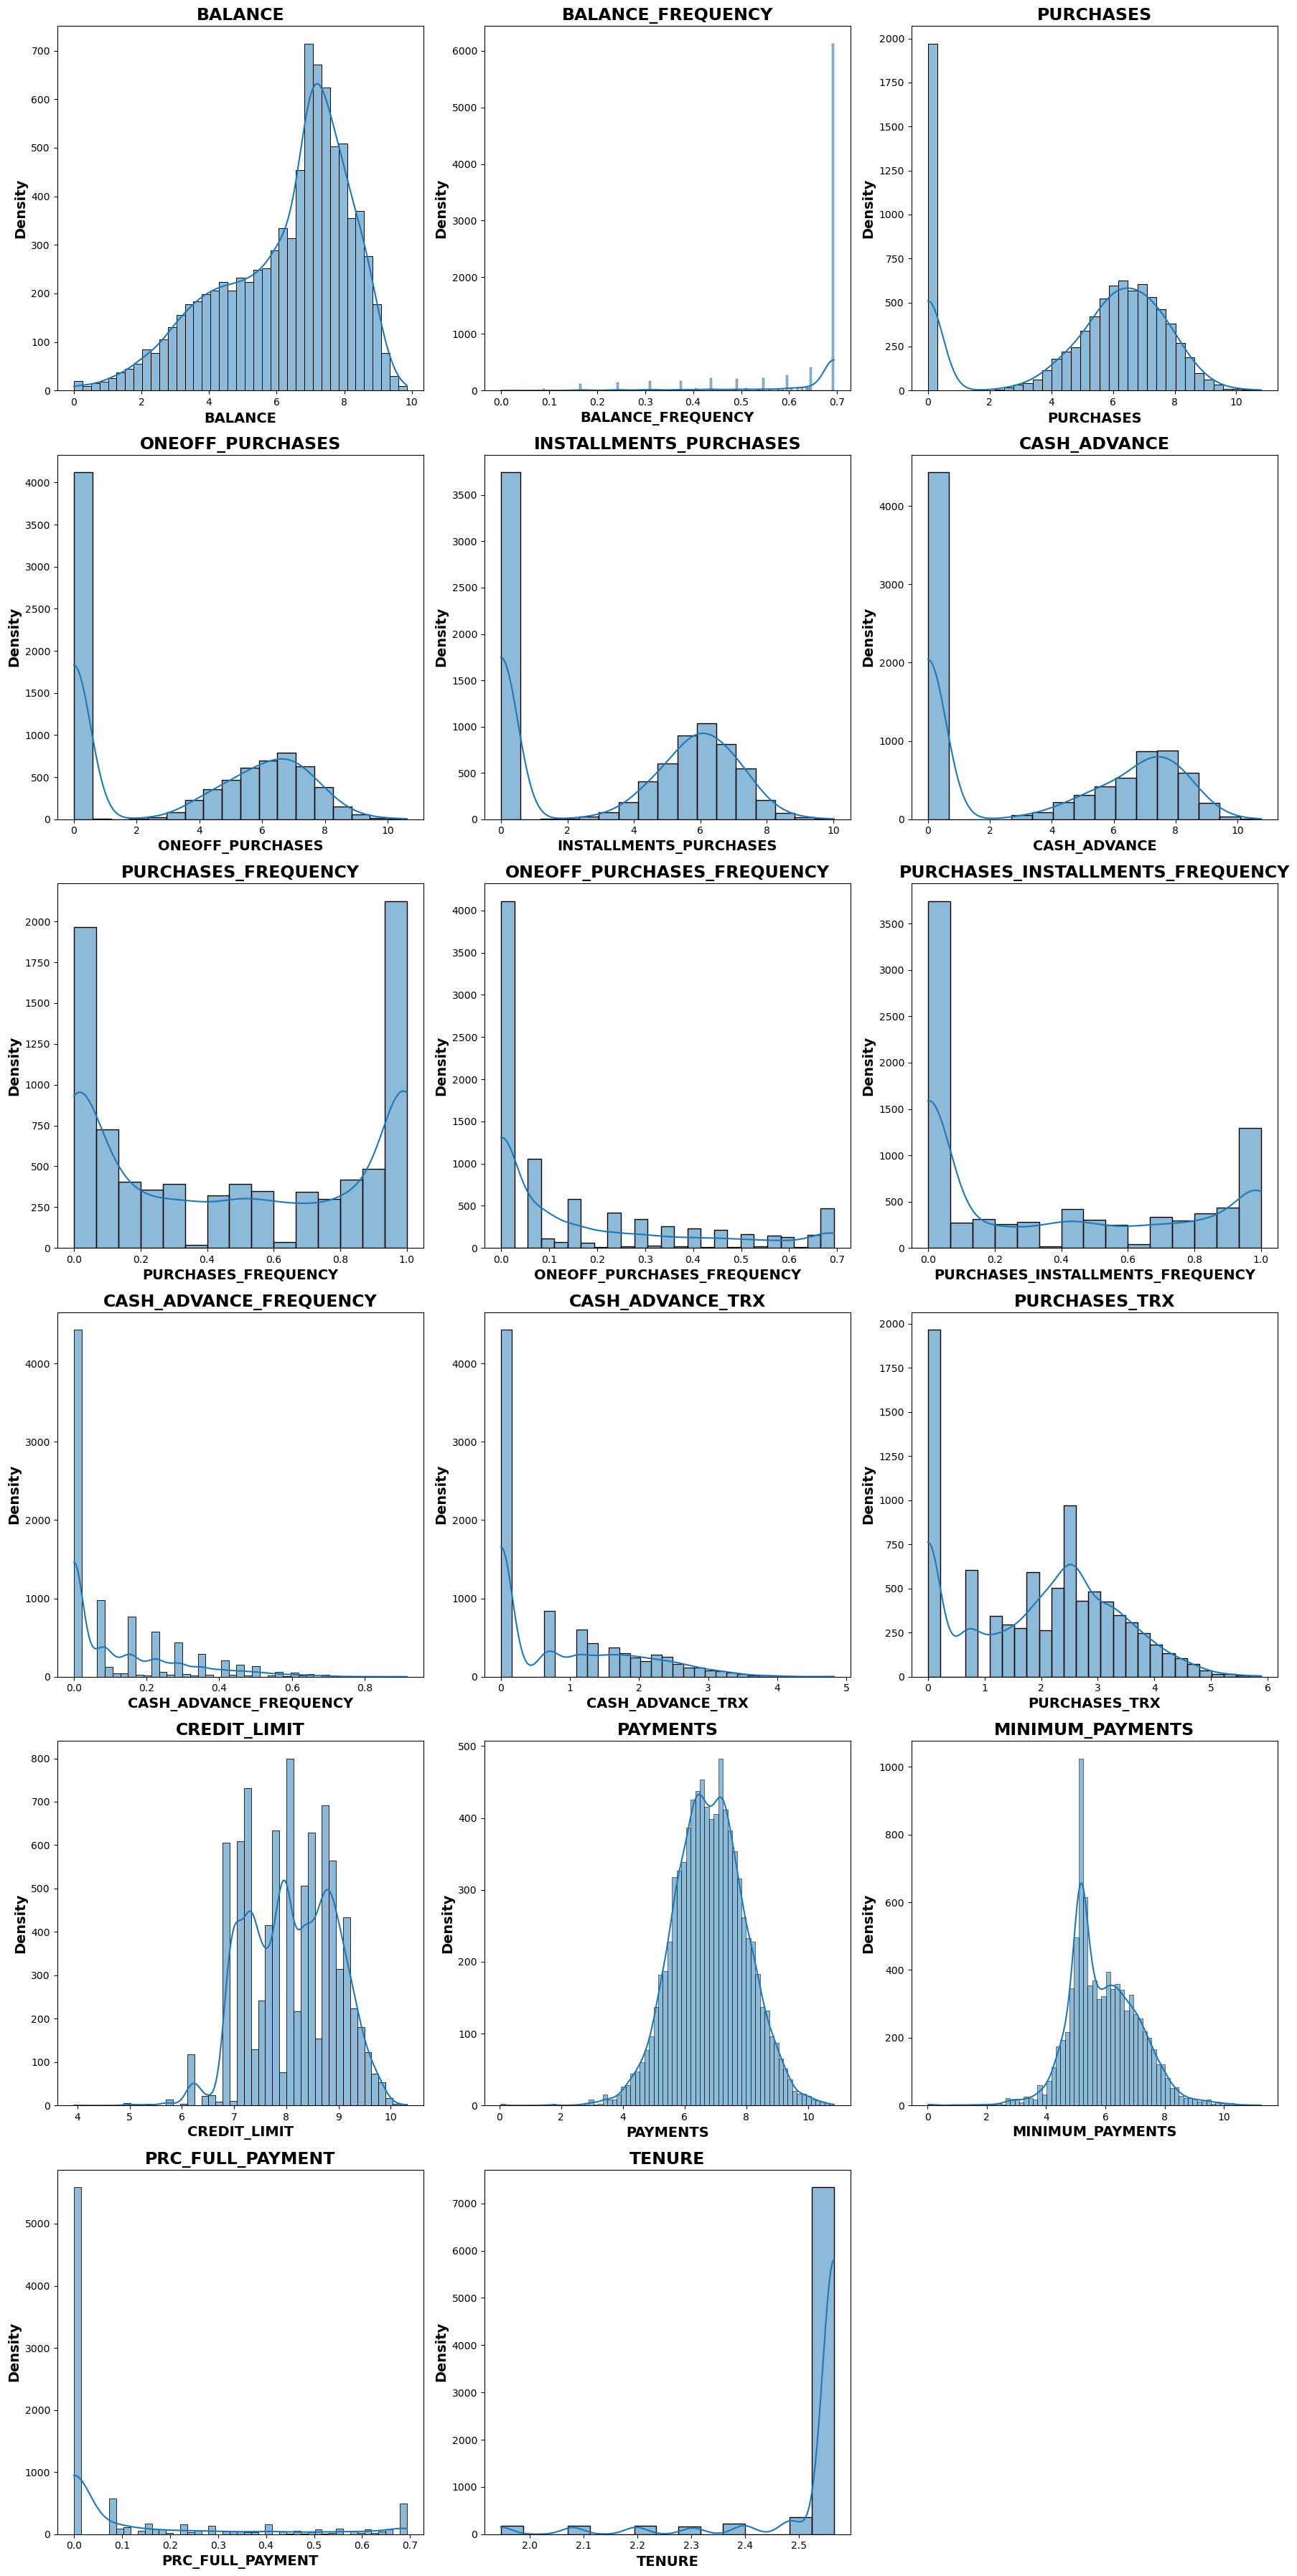

In [41]:
def plot_numerical_data(dataset):
    # calculate the number of rows needed
    num_rows = len(dataset.columns) // 3
    if len(dataset.columns) % 3 != 0:
        num_rows += 1

    # setting up the figure and axes
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))  
    for i, column in enumerate(dataset.columns):
        row = i // 3
        col = i % 3

        # Density plots of numerical columns
        sns.histplot(dataset[column], kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}', fontsize=17, fontweight='bold')
        axes[row, col].set_xlabel(column, fontsize=14, fontweight='bold')
        axes[row, col].set_ylabel('Density', fontsize=14, fontweight='bold')

    # Remove empty subplots
    for i in range(len(dataset.columns), num_rows * 3):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.savefig("1.Numerical_Data_Plot.png", dpi=300)
    plt.show()
    
plot_numerical_data(transformed_df)

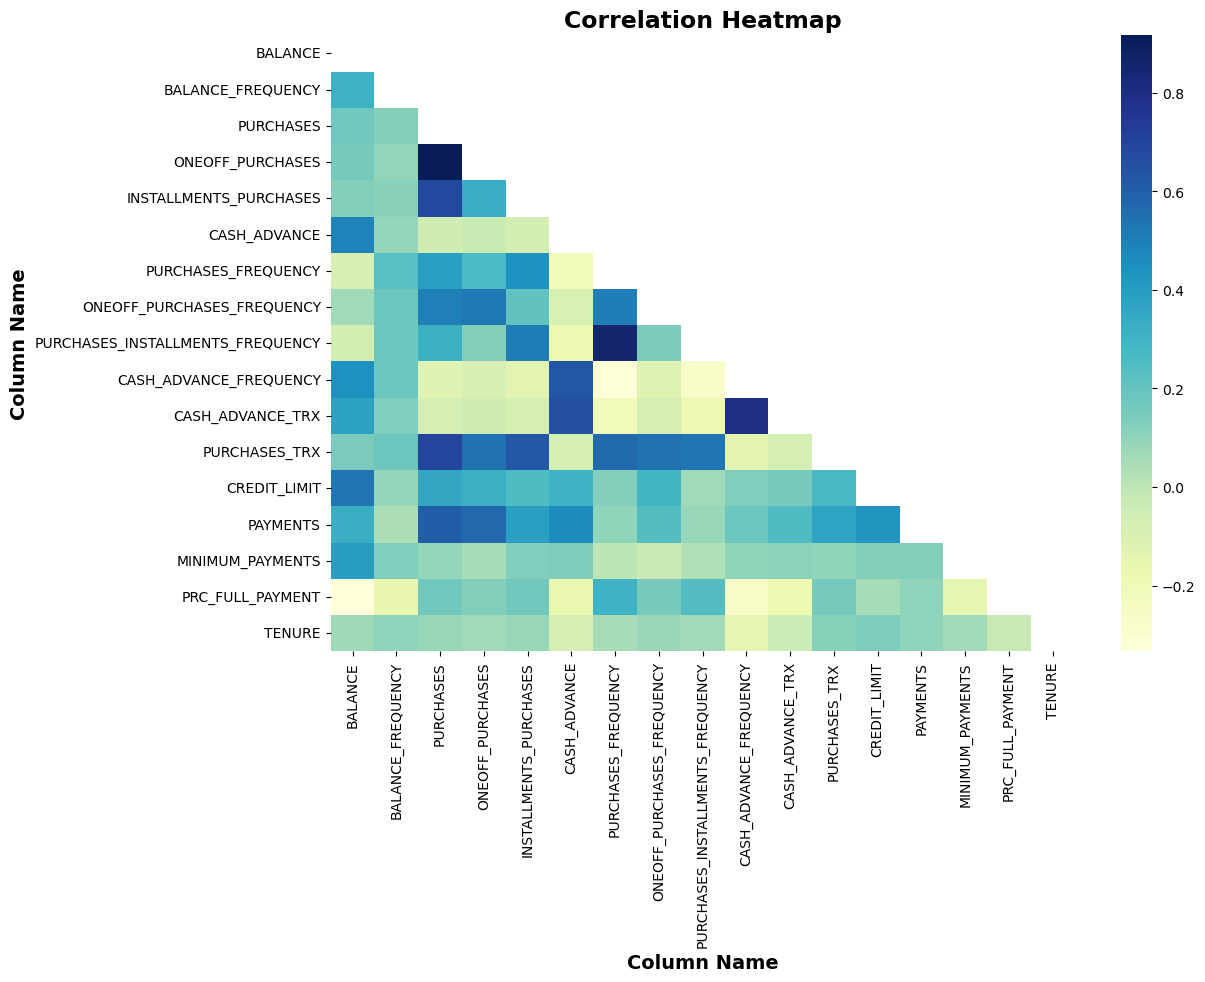

In [42]:
def plot_statistical_heatmap(dataset):
    # extract only numerical columns and find correlation using corr()
    numeric_columns = dataset.select_dtypes(include=['float', 'int']).columns
    corr = dataset[numeric_columns].corr()
    
    # avoid redundancy by getting the lower portion of the heatmap only
    matrix = np.triu(corr)
    
    # build the heatmap
    plt.figure(figsize = (12, 8))
    sns.heatmap(corr, annot=True, fmt=".2%", cmap="YlGnBu", mask=matrix)  # fmt=".2%" to display percentages
    plt.title("Correlation Heatmap", fontsize=17, fontweight='bold')
    plt.xlabel("Column Name", fontsize=14, fontweight='bold')
    plt.ylabel("Column Name", fontsize=14, fontweight='bold')
    plt.savefig('2.Correlation_Heatmap.png', dpi=300)
    plt.show()

plot_statistical_heatmap(df)

In [43]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
corr = df[numeric_columns].corr()
corr

Column,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Column,,,,,,,,,,,,,,,,,
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779


The **correlation coefficient**, ranging from -1 to 1, reflects the strength and direction of the relationship between two variables.
* A value of 1 signifies a perfect positive correlation, indicating that as one variable increases, the other variable also increases.
* A value of -1 indicates a perfect negative correlation, where an increase in one variable corresponds to a decrease in the other.
* A value of 0 denotes no correlation between the variables, suggesting that changes in one variable do not predict changes in the other.

* There is a moderate positive correlation (0.50) between **BALANCE** and **CREDIT_LIMIT**. This suggests that customers with higher credit limits tend to have higher balances.
* There is a strong positive correlation (0.9) between **PURCHASES** and **ONEOFF_PURCHASES**. This suggests that there is a tendency for customers to make substantial individual purchases when they are actively buying. 
* There is a moderate positive correlation (0.69) between **PURCHASES** and **PURCHASES_TRX**. This implies that customers who shop more frequently also tend to spend more overall.
* There is a strong positive correlation (0.8) between **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY**. This suggests that there is a connection between the frequency of purchases and the preference for paying in installments.
* There is a strong positive correlation (0.8) between **CASH_ADVANCE_TRX** and **CASH_ADVANCE_FREQUENCY**. This indicates that customers who conduct more cash advance transactions also tend to do so more frequently. 

#### Scatter Plots of Columns

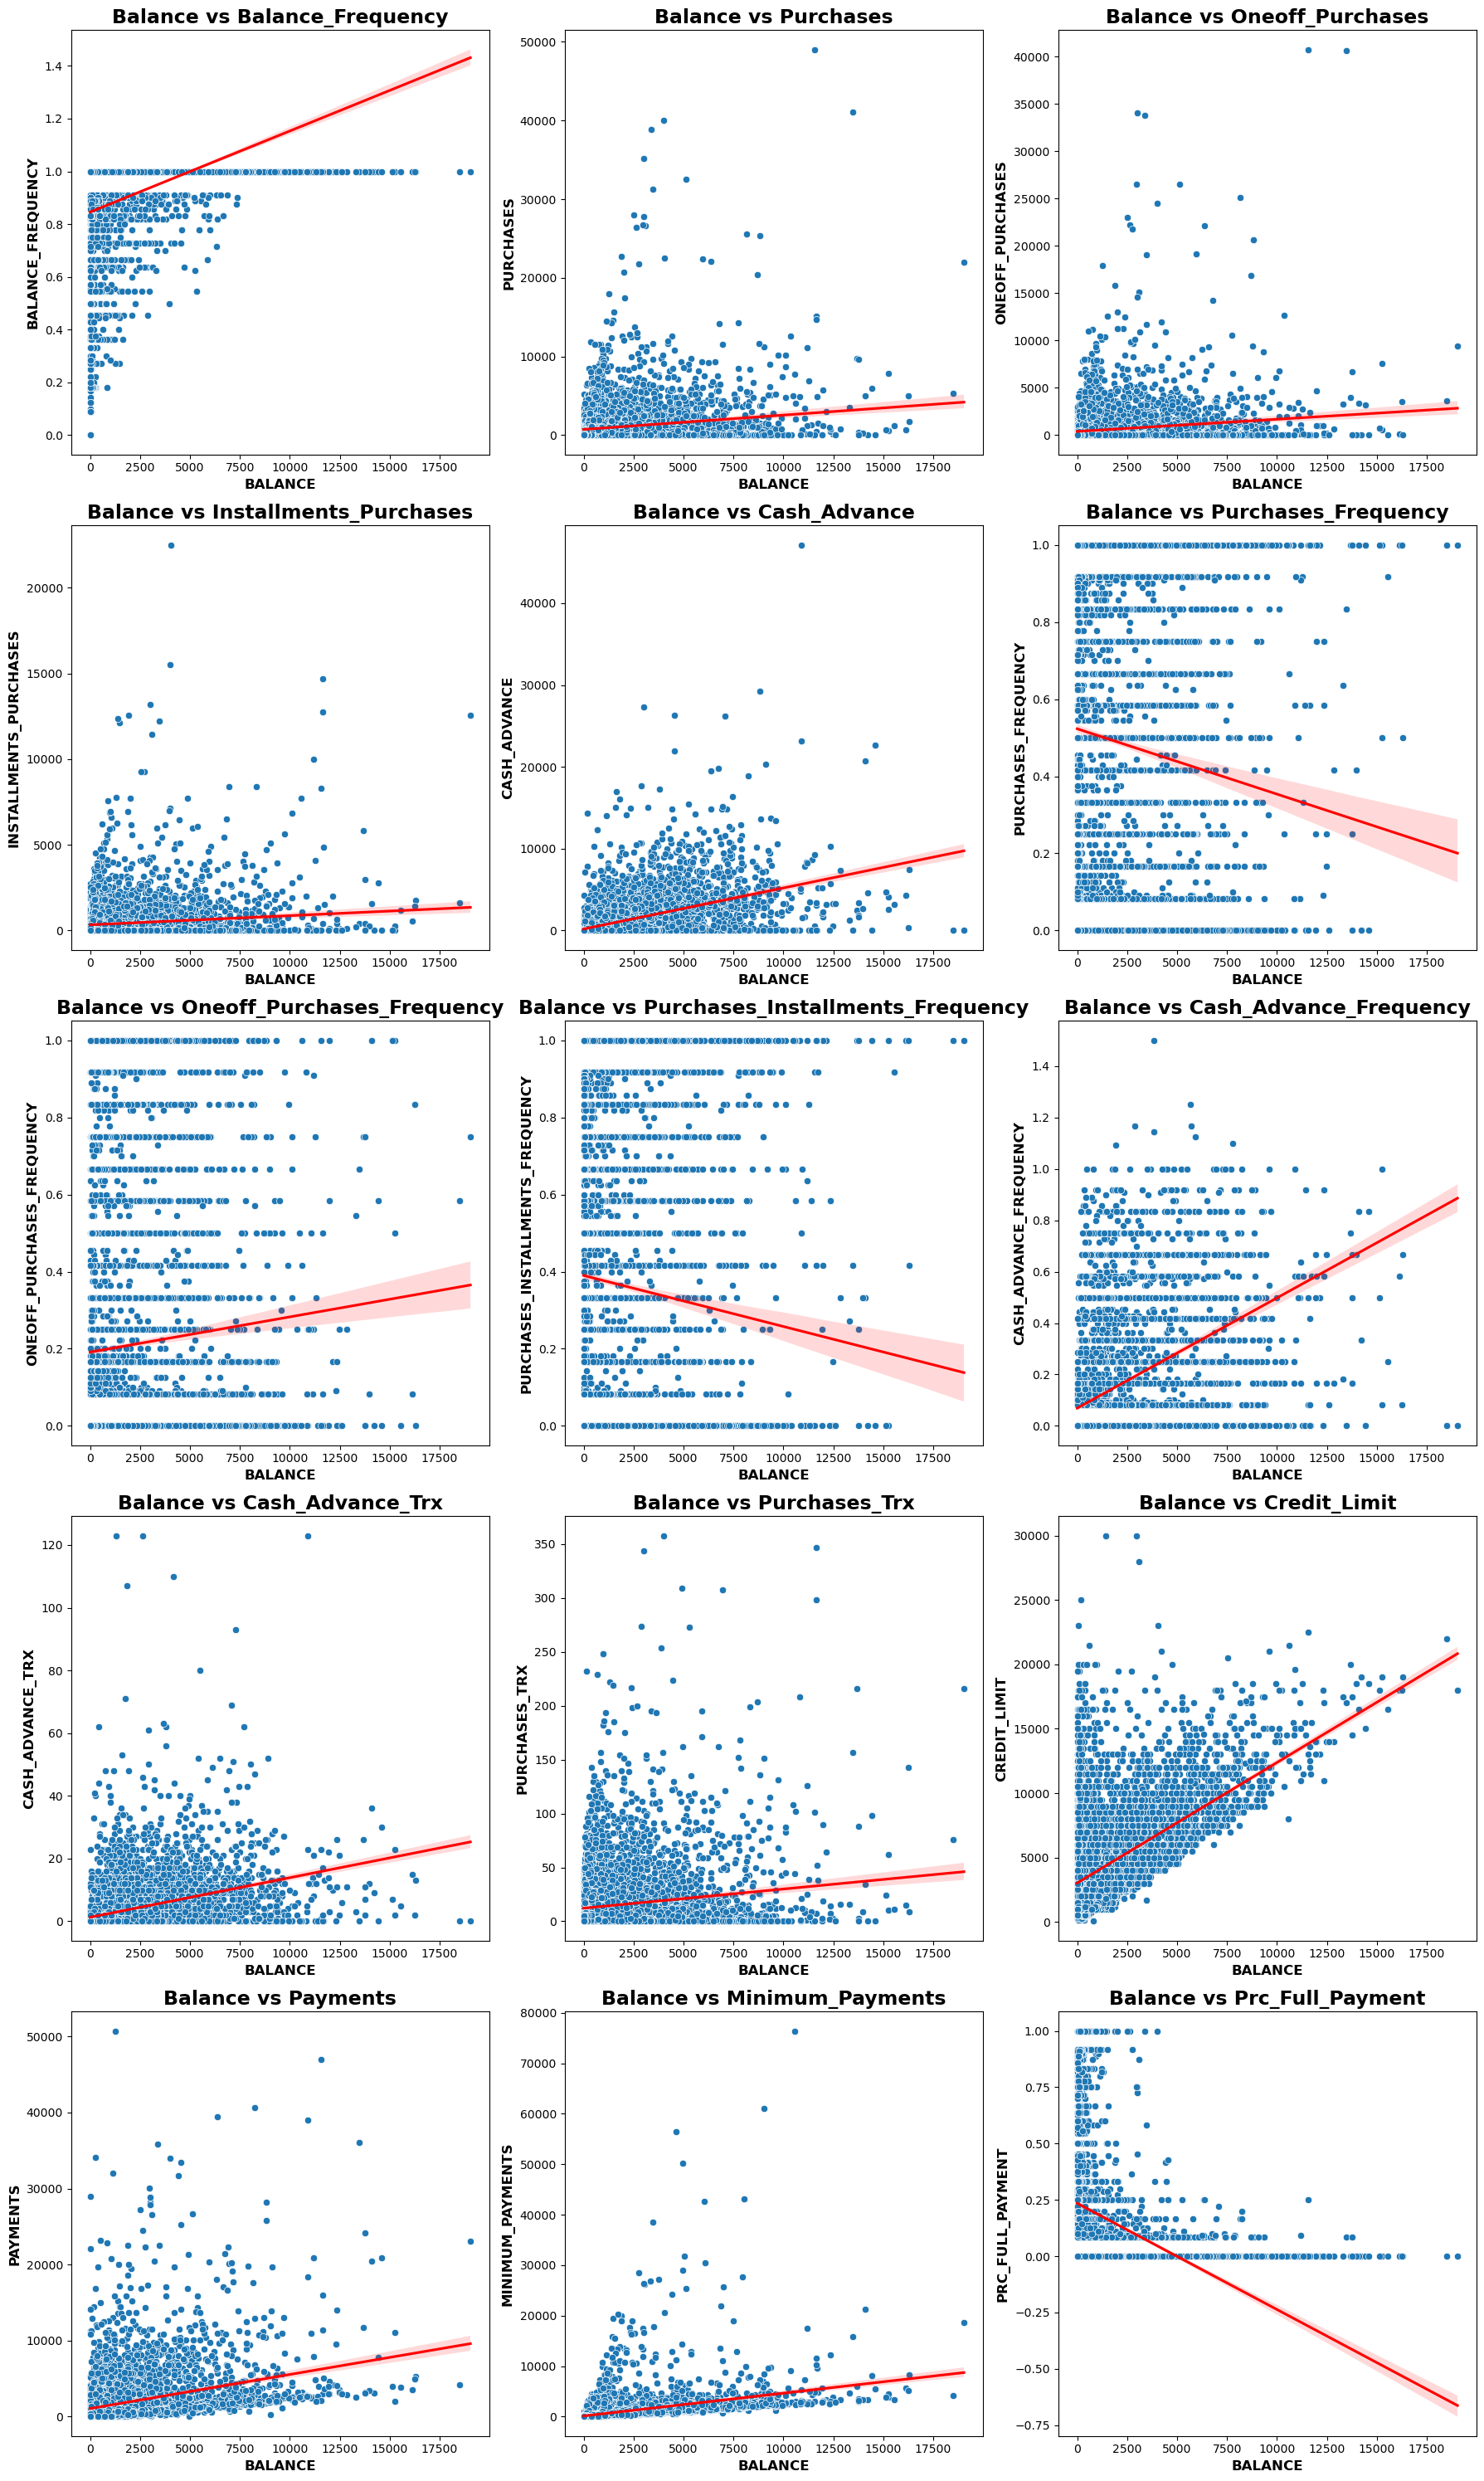

In [44]:
def plot_scatter_plots(dataset):
    columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
               'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
               'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
    
    # calculate the number of rows needed
    num_rows = len(columns[1:]) // 3
    if len(columns[1:]) % 3 != 0:
        num_rows += 1

    # setting up the figure and axes
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))  
    for i, column in enumerate(columns[1:]):
        row = i // 3
        col = i % 3
        
        sns.scatterplot(x = "BALANCE", y = column, data=dataset, ax = axes[row, col])
        sns.regplot(x = "BALANCE", y = column, data = dataset, scatter = False, ax = axes[row, col], color = 'red')
        axes[row, col].set_xlabel('BALANCE', fontsize=12, fontweight='bold')
        axes[row, col].set_ylabel(column, fontsize=12, fontweight='bold')
        axes[row, col].set_title(f'Balance vs {str.title(column)}', fontsize=17, fontweight='bold')
        
    # Remove empty subplots
    for i in range(len(columns[1:]), num_rows * 3):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])
        
    plt.tight_layout()
    plt.savefig('3.Scatter_Plots_of_Balance_vs_Other_Variables.png', dpi=300)
    plt.show()
    
plot_scatter_plots(df)

### Model Training and Evaluation

#### Elbow Method to Select Optimal Number of Clusters

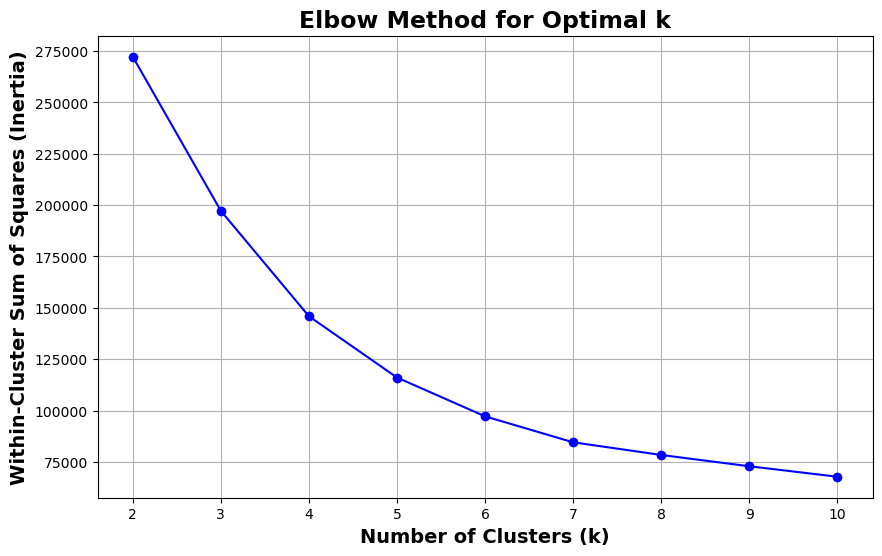

In [47]:
def apply_elbow_method(dataset):
    # initialize lists to store inertia values
    inertia_values = []
    
    # test different values of k (clusters) 
    k_values = range(2, 11)  
    for k in k_values:
        # Create KMeans clustering model
        kmeans = KMeans(n_clusters = k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(dataset)
    
        # Append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    return k_values, inertia_values
    
k_values, inertia_values = apply_elbow_method(transformed_df)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('4._Elbow_Method.png', dpi=300)
plt.show()

The optimal number of clusters in this case seems to be 7 as after 7, the line is starting to become straight.

#### Dimensionality Reduction Using T-SNE for Better Results

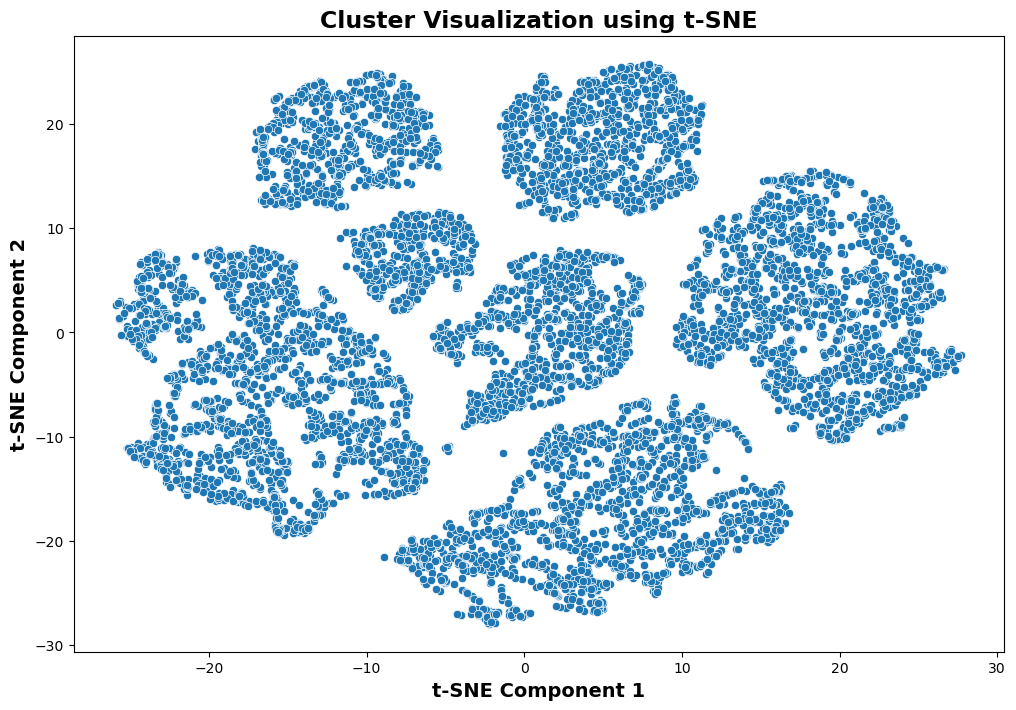

In [48]:
def apply_t_sne_reduction(dataset):
    # initialize t-SNE with desired parameters
    tsne = TSNE(n_components=2, perplexity = 30, learning_rate = 0.5, n_iter = 3000)
    X_tsne = tsne.fit_transform(dataset)
    
    # create a DataFrame to store the reduced data
    df_reduced = pd.DataFrame(data = X_tsne, columns = ['t-SNE Component 1', 't-SNE Component 2'])

    return df_reduced

df_reduced = apply_t_sne_reduction(transformed_df)

# Plotting the clusters
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 't-SNE Component 1', y = 't-SNE Component 2', data = df_reduced)
plt.title('Cluster Visualization using t-SNE', fontsize = 17, fontweight = 'bold')
plt.xlabel('t-SNE Component 1', fontsize=14, fontweight='bold')
plt.ylabel('t-SNE Component 2', fontsize=14, fontweight='bold')
plt.savefig("5._Cluster_Visualization-using_t-SNE.png")
plt.show()

#### K-Means Model Creation

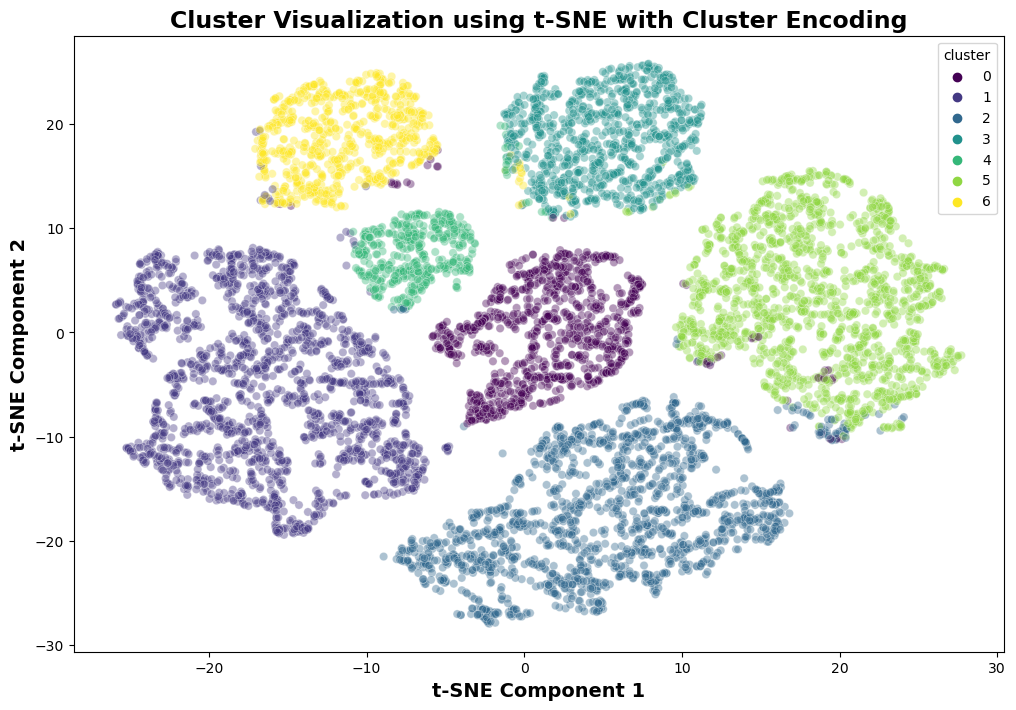

In [49]:
def k_means_clustering(dataset):
    # instantiate the KMeans model
    kmeans_model = KMeans(n_clusters = 7)
    
    # fit the model to the scaled data
    kmeans_model.fit(dataset)

    return kmeans_model

kmeans_model = k_means_clustering(transformed_df)

# add a cluster column in the reduced data
df_reduced['cluster'] = kmeans_model.labels_

# Plot the clusters made by the K-Means model
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 't-SNE Component 1', y = 't-SNE Component 2', hue = 'cluster', data = df_reduced, palette='viridis', alpha=0.4 )
plt.title('Cluster Visualization using t-SNE with Cluster Encoding', fontsize = 17, fontweight = 'bold')
plt.xlabel('t-SNE Component 1', fontsize=14, fontweight='bold')
plt.ylabel('t-SNE Component 2', fontsize=14, fontweight='bold')
plt.savefig("6.Cluster_Visualization_using_t-SNE_with_Cluster_Encoding.png")
plt.show()

#### Fitting Predictions

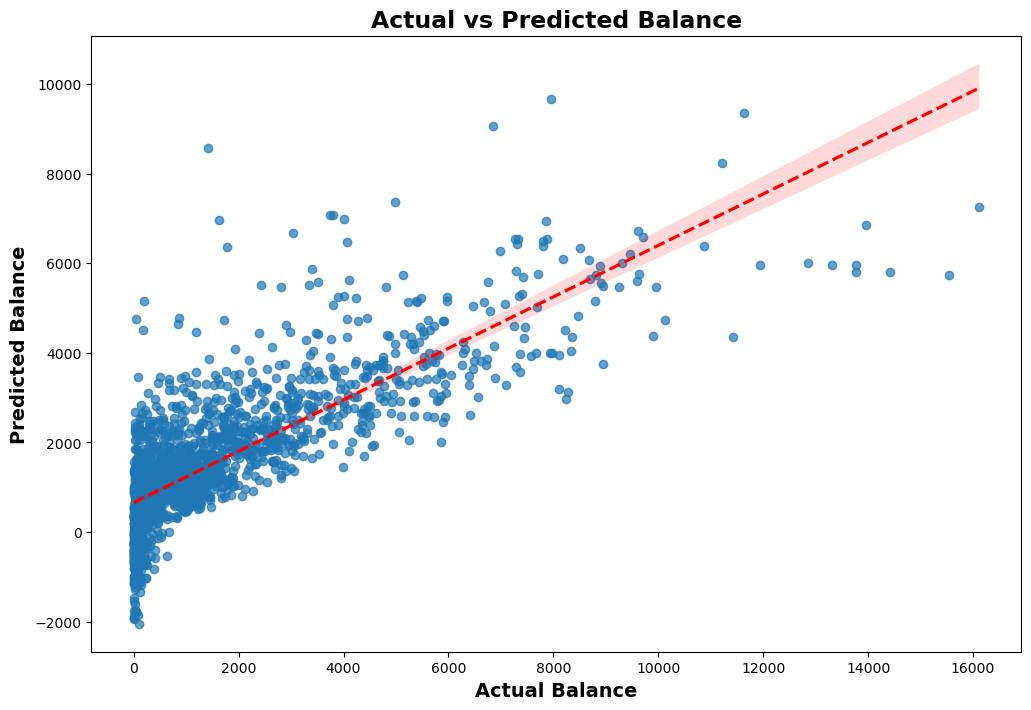

In [58]:
def fitting_predictions(X_train, y_train, X_test):    
    # initialize Linear Regression model
    LR_model = LinearRegression()
    
    # fit the model on the training data
    LR_model.fit(X_train, y_train)

    # predict on the test data
    y_pred = LR_model.predict(X_test)

    return LR_model, y_pred

# separate features (X) and target variable (y)
X = df.drop('BALANCE', axis=1)
y = df['BALANCE']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_model, y_pred = fitting_predictions(X_train, y_train, X_test)

# plot the predicted vs actual values with confidence intervals
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.7}, line_kws={"color":"red", "linestyle":"--"}, ci=95)
plt.title('Actual vs Predicted Balance', fontsize=17, fontweight='bold')
plt.xlabel('Actual Balance', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Balance', fontsize=14, fontweight='bold')
plt.savefig('7.Linear_Regression_on_Balance.png', dpi=300)
plt.show()

#### Linear Regression Evaluation

In [57]:
def evaluate_fitting_predictions(LR_model, y_test, y_pred):
    # calculate the model's coefficients and intercept
    coefficients = LR_model.coef_
    intercept = LR_model.intercept_
    print(f'Coefficients {coefficients}')
    print(f'Intercept: {intercept}')
    
    # calculate r-squared score (accuracy)
    r2 = r2_score(y_test, y_pred)
    print(f'R2: {r2}')
    
    # calculate root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'RMSE: {rmse}')
    
    # calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE {mae}')

evaluate_fitting_predictions(LR_model, y_test, y_pred)

Coefficients [ 1.61336799e+03  3.82751047e-01 -2.86943327e-01 -3.24097856e-01
  2.32534852e-01 -1.26728890e+02 -4.86193083e+02 -2.18607680e+02
  1.98085836e+03 -1.88975399e+01  7.96740161e+00  2.27578259e-01
 -4.45763386e-02  2.02975730e-01 -1.50704732e+03  1.71861689e+01]
Intercept: -1335.2913619728572
R2: 0.6178389648467992
RMSE: 1361.815922321654
MAE 907.7447052914692
